# Solution to the lab 1
In this notebook, we use the following modules `numpy` and `maze`. The latter is a home made module, where all the solutions to the questions are implemented. We will refer to it at each answer, and we encourage you to read it.

In [1]:
import numpy as np
import maze_lab1 as mz 
import pandas as pd

# Problem 1: Shortest path in the maze

The objective of problem 1 is to solve the shortest path problem in a maze. We start first by describing the maze as a numpy array. 

## MDP formulation

We propose the following MDP formulation: 

#### State space $\mathcal{S}$
We model the state space separately for the human player and the minotaur in the maze. We have excluded the positions where the walls are located from the possible states of the human player. However, since the minotaur is capable of going through the wall, we defined the minotaur states as all possible positions in the maze. Formally, the state space is

$$\mathcal{S_{player}} = \big\lbrace (x,y):\textrm{such that the cell
} (x,y) \textrm{ is not an obstacle}\big\rbrace$$

$$\mathcal{S_{minotaur}} = \big\lbrace (x,y)\big\rbrace$$


#### Action space $\mathcal{A}$
We allow the player to chose to either move `left`, `right`, `down`, `up` or not move at all (`stay`). Note that sometimes the player cannot move in a certain direction because of an obstacle or a wall, yet we permit this to be action. We will see that this is not an issue as long as we define our transition probabilities and rewards appropriately. We also define the action space of minotaur similarly. However, we do permit the move through the wall in this case. 
Formally, the action space is

$$\mathcal{A_{player}} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace$$

$$\mathcal{A_{minotaur}} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace$$


#### Transition probabilities $\mathcal{P}$
Note that there is no randomness involved upon taking an action by the player. As a consequence, the transition probabilities are deterministic. More precisely,   
- If at state (or position) $s$ taking action (or move) $a$ does not lead to a wall or an obstacle but to another state (or position) $s'$, then $\mathbb{P}(s' \vert s, a) = 1$. 
- If at state (or position)  $s$ taking action (or move) $a$ leads to a wall or an obstacle, the player remains in his state (or position) $s$, then $\mathbb{P}(s \vert s, a) = 1$.
- If the state (or position) $s_{player}$ is the same as $s_{minotaur}$, then the player will be caught by the minotaur, $\mathbb{P}(s_{player} \vert s_{player} = s_{minotaur}, a) = 0$.


#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.
   - If at state $s$, taking action $a$, leads to be caught by the minotaur, then $r(s,a) = -200$
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -100$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = -1$. 
   - If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 0$. 

 

In [2]:
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])



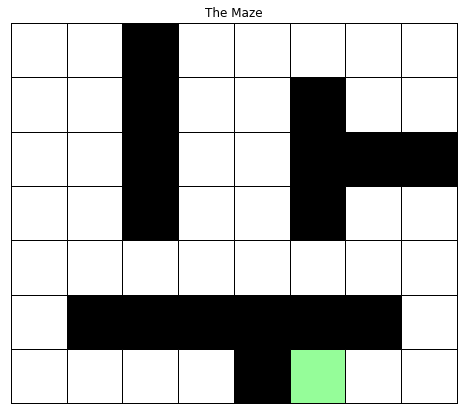

In [3]:
mz.draw_maze(maze)

In [4]:
env = mz.Maze(maze)
env.show()

The player states are :
{0: (0, 0), 1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (0, 4), 5: (0, 5), 6: (0, 6), 7: (0, 7), 8: (1, 0), 9: (1, 1), 10: (1, 2), 11: (1, 3), 12: (1, 4), 13: (1, 5), 14: (1, 6), 15: (1, 7), 16: (2, 0), 17: (2, 1), 18: (2, 2), 19: (2, 3), 20: (2, 4), 21: (2, 5), 22: (2, 6), 23: (2, 7), 24: (3, 0), 25: (3, 1), 26: (3, 2), 27: (3, 3), 28: (3, 4), 29: (3, 5), 30: (3, 6), 31: (3, 7), 32: (4, 0), 33: (4, 1), 34: (4, 2), 35: (4, 3), 36: (4, 4), 37: (4, 5), 38: (4, 6), 39: (4, 7), 40: (5, 0), 41: (5, 1), 42: (5, 2), 43: (5, 3), 44: (5, 4), 45: (5, 5), 46: (5, 6), 47: (5, 7), 48: (6, 0), 49: (6, 1), 50: (6, 2), 51: (6, 3), 52: (6, 4), 53: (6, 5), 54: (6, 6), 55: (6, 7)}
The minotaur states are :
{0: (0, 0), 1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (0, 4), 5: (0, 5), 6: (0, 6), 7: (0, 7), 8: (1, 0), 9: (1, 1), 10: (1, 2), 11: (1, 3), 12: (1, 4), 13: (1, 5), 14: (1, 6), 15: (1, 7), 16: (2, 0), 17: (2, 1), 18: (2, 2), 19: (2, 3), 20: (2, 4), 21: (2, 5), 22: (2, 6), 23: (2, 7), 24: (3, 

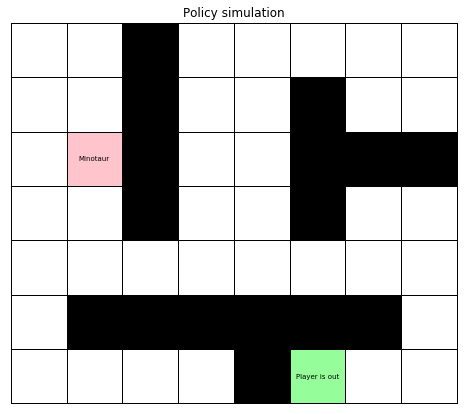

In [5]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);

method = 'DynProg'
start_player = (0,0)
start_minotaur = (6, 5)
path_player, path_minotaur = env.simulate(start_player, start_minotaur, policy, method)

mz.animate_solution(maze, path_player, path_minotaur)